In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



/Users/jamesoh/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [17]:
job_data = pd.read_csv('job_postings.csv')
print(job_data.head())


      job_id  company_id                     title  \
0   85008768         NaN  Licensed Insurance Agent   
1  133114754  77766802.0             Sales Manager   
2  133196985   1089558.0        Model Risk Auditor   
3  381055942  96654609.0          Business Manager   
4  529257371   1244539.0       NY Studio Assistant   

                                         description  max_salary  med_salary  \
0  While many industries were hurt by the last fe...     52000.0         NaN   
1  Are you a dynamic and creative marketing profe...         NaN         NaN   
2  Join Us as a Model Risk Auditor – Showcase You...         NaN         NaN   
3  Business ManagerFirst Baptist Church ForneyFor...         NaN         NaN   
4  YOU COULD BE ONE OF THE MAGIC MAKERS\nKen Fulk...         NaN         NaN   

   min_salary pay_period formatted_work_type           location  ...  \
0     45760.0     YEARLY           Full-time          Chico, CA  ...   
1         NaN        NaN           Full-time  Sant

In [ ]:
# Pre-processing part

# drop data where salary information is not provided
job_data = job_data.dropna(subset=['max_salary', 'min_salary'])

# needed to convert hourly, or monthly wage into yearly
pay_period_mapping = {
    'YEARLY': 1,
    'MONTHLY': 12,
    'HOURLY': 2080
}

# multiply each cell in salary according to each pay period
job_data['avg_max_salary'] = job_data['max_salary'] * job_data['pay_period'].map(pay_period_mapping)
job_data['avg_min_salary'] = job_data['min_salary'] * job_data['pay_period'].map(pay_period_mapping)

grouped_data = job_data.groupby(['title', 'location', 'work_type', 'pay_period'])[['avg_max_salary', 'avg_min_salary']].mean().reset_index()

# save as CSV
grouped_data.to_csv('preprocessed_job_postings.csv', index=False)



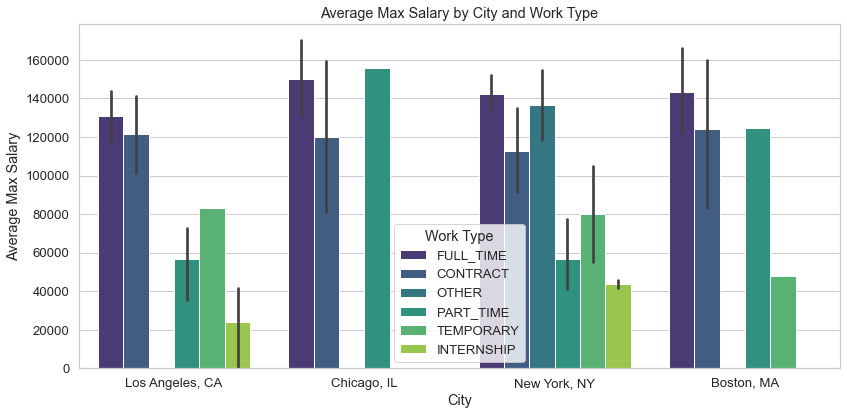

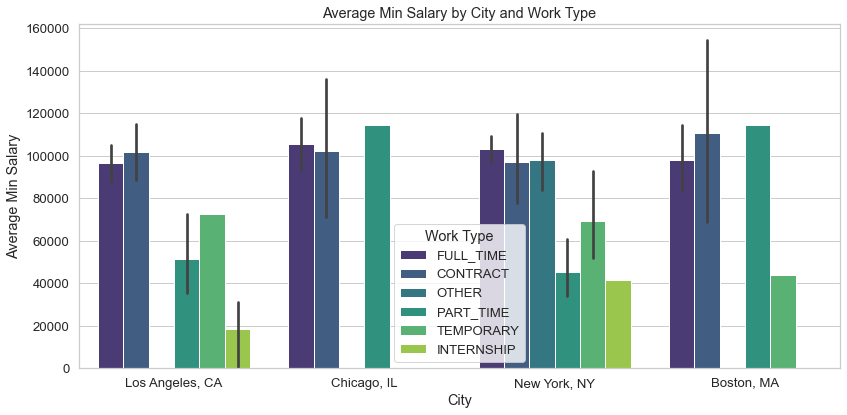

In [31]:
# data visualization
job_postings_data = pd.read_csv('preprocessed_job_postings.csv')

cities_to_include = ['Chicago, IL', 'New York, NY', 'Los Angeles, CA', 'Boston, MA']
filtered_data = job_postings_data[job_postings_data['location'].isin(cities_to_include)]

sns.set(style="whitegrid", font_scale=1.2)

plt.figure(figsize=(12, 6))
sns.barplot(x='location', y='avg_max_salary', hue='work_type', data=filtered_data, palette='viridis')
plt.xlabel('City')
plt.ylabel('Average Max Salary')
plt.title('Average Max Salary by City and Work Type')
plt.xticks(rotation=0)
plt.tight_layout()
plt.legend(title='Work Type')
plt.show()

plt.figure(figsize=(12, 6))
sns.barplot(x='location', y='avg_min_salary', hue='work_type', data=filtered_data, palette='viridis')
plt.xlabel('City')
plt.ylabel('Average Min Salary')
plt.title('Average Min Salary by City and Work Type')
plt.xticks(rotation=0)
plt.tight_layout()
plt.legend(title='Work Type')
plt.show()




In [32]:
living_wage_data = pd.read_csv('living_wage.csv')
print(living_wage_data.head())


   rank_2020         city       state  population_2020  population_2010  \
0          1     New York    New York          8804190          8175133   
1          2  Los Angeles  California          3898747          3792621   
2          3      Chicago    Illinois          2746388          2695598   
3          4      Houston       Texas          2304580          2099451   
4          5      Phoenix     Arizona          1608139          1445632   

   land_area_sqmi  density  one_adult_no_kids_living_wage  \
0           300.5    29298                          20.00   
1           469.5     8304                          19.22   
2           227.7    12061                          16.08   
3           640.4     3599                          14.29   
4           518.0     3105                          15.41   

   one_adult_one_kid_living_wage  one_adult_two_kids_living_wage  \
0                          38.99                           49.18   
1                          41.55              

In [34]:
# Pre-processing

# Create a new column 'avg_salary' as the average of 'avg_max_salary' and 'avg_min_salary'
job_postings_data['avg_salary'] = (job_postings_data['avg_max_salary'] + job_postings_data['avg_min_salary']) / 2

# Convert hourly wage into yearly wage
living_wage_data['yearly_wage'] = living_wage_data['one_adult_no_kids_living_wage'] * 2080

# Define a mapping between the city names in the job postings data and the living wage data
city_mapping = {
    'Chicago, IL': 'Chicago',
    'New York, NY': 'New York',
    'Los Angeles, CA': 'Los Angeles',
    'Boston, MA': 'Boston'
}

# Apply the mapping to the 'location' column in the job postings data
job_postings_data['location'] = job_postings_data['location'].map(city_mapping)

# Calculate average yearly salary for each city (Chicago, Los Angeles, New York) from job postings data
average_salary = job_postings_data.groupby('location')['avg_salary'].mean().reset_index()

# Merge the average salary and yearly wage data on the 'location' column
merged_data = average_salary.merge(living_wage_data, left_on='location', right_on='city')

# Compute the difference between average salary and yearly wage
merged_data['salary_difference'] = merged_data['avg_salary'] - merged_data['yearly_wage']




In [ ]:
# Visualization

sns.set(style="whitegrid", font_scale=1.2)


# Plot 1: Average Yearly Living Wage of Three Cities
plt.figure(figsize=(10, 6))
sns.barplot(x='location', y='yearly_wage', data=merged_data, palette='viridis')
plt.xlabel('City')
plt.ylabel('Average Yearly Living Wage')
plt.title('Average Yearly Living Wage in Three Cities')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

# Plot 2: Difference between Average Salary and Yearly Living Wage of Three Cities
plt.figure(figsize=(10, 6))
sns.barplot(x='location', y='salary_difference', data=merged_data, palette='viridis')
plt.xlabel('City')
plt.ylabel('Difference in Yearly Wage (Average Salary - Yearly Wage)')
plt.title('Difference in Yearly Wage (Average Salary - Yearly Living Wage) in Three Cities')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()